In [9]:
"""
Chart Visualtions for stocks using seaborn library
"""

%run assets/libraries_import.ipynb
%run assets/functions.ipynb


link_usdt_data_frame = return_data_frame(return_data_query(crypto_list[0],from_period,to_period,interval)) #LINK/USDT data frame
dot_usdt_data_frame = return_data_frame(return_data_query(crypto_list[1],from_period,to_period,interval)) #DOT/USDT data frame
uniswap_data_frame = return_data_frame(return_data_query(crypto_list[2],from_period,to_period,interval)) #UNI/USDT data frame

In [4]:
link_usdt_data_frame.describe()

,Open,High,Low,Close,Adj Close,Volume
count,62.000000,62.000000,62.000000,62.000000,62.000000,6.200000e+01
mean,26.446977,27.469375,25.141081,26.274486,26.274486,1.097785e+09
std,5.488748,5.650889,5.460357,5.510837,5.510837,4.275436e+08
min,17.787418,18.573771,15.549089,17.587616,17.587616,5.803661e+08
25%,20.509765,21.423813,19.363434,20.509371,20.509371,8.285989e+08
50%,26.655825,27.554596,25.669477,26.392433,26.392433,9.818458e+08
75%,31.623636,32.398068,29.894839,31.429160,31.429160,1.241650e+09
max,34.750072,38.161388,33.556553,34.837170,34.837170,2.719352e+09


In [7]:
dot_usdt_data_frame.describe()

,Open,High,Low,Close,Adj Close,Volume
count,62.000000,62.000000,62.000000,62.000000,62.000000,6.200000e+01
mean,38.251718,39.578446,36.245301,37.988613,37.988613,1.637471e+09
std,9.100063,9.286630,8.865694,9.158440,9.158440,7.340236e+08
min,24.042261,25.018566,23.313160,24.050674,24.050674,7.446986e+08
25%,29.209766,29.864909,26.810624,28.510378,28.510378,1.193242e+09
50%,39.485596,41.204811,38.100279,39.207693,39.207693,1.390012e+09
75%,44.759854,45.957020,42.232076,44.648193,44.648193,1.876235e+09
max,53.877750,55.004974,52.254654,53.881733,53.881733,4.338985e+09


In [10]:
uniswap_data_frame.describe()

,Open,High,Low,Close,Adj Close,Volume
count,62.000000,62.000000,62.000000,62.000000,62.000000,6.200000e+01
mean,21.105701,21.816293,20.152101,20.956151,20.956151,3.132488e+08
std,4.173963,4.244933,4.218872,4.135194,4.135194,1.400840e+08
min,14.156897,15.010784,13.444022,14.148139,14.148139,1.425108e+08
25%,17.186579,17.805795,15.958156,17.200514,17.200514,2.199742e+08
50%,21.308180,22.203385,20.564576,21.238249,21.238249,2.739112e+08
75%,25.146968,25.661903,24.173293,24.979548,24.979548,3.511362e+08
max,26.869978,28.431030,26.298906,26.855335,26.855335,7.786331e+08


In [18]:
data = return_grouped_data_frame('High',crypto_list).head(5)

print(data)

    LINK-USD    DOT-USD   UNI1-USD
0  31.535463  44.200764  27.244003
1  32.902344  44.776077  26.705355
2  33.785301  46.018200  28.277134
3  33.897488  45.773479  28.294722
4  30.833912  43.114502  25.356411


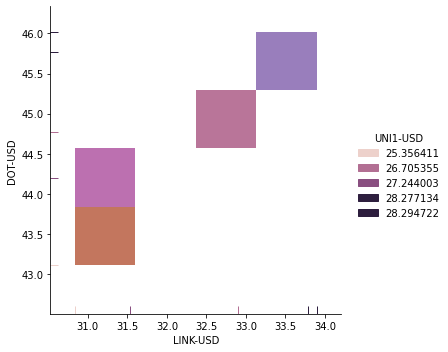

In [26]:
sns.displot(data, x="LINK-USD",y="DOT-USD",hue="UNI1-USD",kind="hist",rug=True)